# In Class Exercise 7.3: Fun Survey (and More Basic Practice with Dataframes)

Getting started: 

* Results of the survey we asked the class to complete at the beginning of the semester are available here: https://docs.google.com/spreadsheets/d/1ip_dVSgO2JtStc5z8AojBUxHLpi17dtPNygNPaLgY58/edit?usp=sharing.
* Open that file in google forms. Go to File--> Download as--> download as CSV
* Take the downloaded file and upload it to the same folder as this notebook on JupyterLab.
***
## Step 1:
* Import pandas as pd. 
* Import matplotlib.pyplot as plt
* Use code to make your graphs look nice.
* Read the csv file and assign the result to `df`.

In [1]:
# write and test your code here

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classsurvey.csv')

In [2]:
# solution

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('classsurvey.csv')

## Step 2:
* Check your dataframe.
* Check the datatypes for each columns. Think about the types of questions you could answer with this data. Think about how the data might need to be cleaned to answer those questions. 
* Use code to print the total number of student survey responses contained in the dataframe. (How many people answered the survey?) 

In [3]:
# write and test your code here

print('The total number of students survey responses is:', df.shape[0])

The total number of students survey responses is: 53


In [4]:
# solution

print('The dataframe method `info()` will print information about the dataframe include the datatype of each column.')
print('')
print('df.info() prints:')
df.info()
print('')
print('-' * 70)
print('')
print('The shape attribute of the dataframe will return a tuple (similar to a list) that represents the number of rows and the number of columns.')
print('df.shape returns:', df.shape)
print('')
print('Can use indexing to return only the rows which will tell us how many people answered the survey.')
print('The number of people who answered the survey is:', df.shape[0])
print('')
print('Note: This is just one way this problem can be solved. Other solutions are equally valid.')

The dataframe method `info()` will print information about the dataframe include the datatype of each column.

df.info() prints:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 14 columns):
Timestamp                                                                                                                                     53 non-null object
Who is your favorite music artist (broadly defined)?                                                                                          49 non-null object
What physical height would you like to be?                                                                                                    53 non-null object
If you had to live in city, but could pick any city in the world, what city would you live in?                                                53 non-null object
If you could have 30 minutes to talk with any person, living or dead, who would you pick?                                   

## Step 3:
* Rename your columns using `renamelist` below to make your columns easier to work with 
* Check your dataframe to confirm this has worked. 

In [5]:
renamelist = ['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel', 'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year', 'quote']

# write and test your code here
df.columns = renamelist
df.columns

Index(['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel',
       'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year',
       'quote'],
      dtype='object')

In [6]:
renamelist = ['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel', 'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year', 'quote']

# solution

# df.columns is an attribute of the dataframe, it is a list that contain the column labels of the dataframe. It can be manipulated like any other list.
df.columns = renamelist
df.columns

Index(['Timestamp', 'musicartist', 'height', 'city', '30min', 'travel',
       'likepizza', 'deepdish', 'sport', 'spell', 'hangout', 'talk', 'year',
       'quote'],
      dtype='object')

## Step 4:
* The survey asked 'Do you think you talk more or less than the average person?', 'Is Chicago-style deep dish actually pizza or is it really casserole?', 'Which is the most difficult to spell? '. Create descriptive statistics and vizualizations that desribe students responses to each of these three questions seperately. 
* Use cross-tabs to examine whether there is any relation between how a student answered these questions. For example, do students who think deep dish is a casserole also say they talk more than the average person? 


In [7]:
# write and test your code here
talkcounts = df['talk'].value_counts()
talkcounts

Less    32
More    21
Name: talk, dtype: int64

In [8]:
# solution

# add the target column labels to a list so I don't have to type them over and over again
step4list = ['talk', 'deepdish','spell']

# use describe() method to get some descriptives. Transpose the result to make it a bit easier to read.
df[step4list].describe().transpose()

,count,unique,top,freq
talk,53,2,Less,32
deepdish,53,3,pizza,36
spell,53,3,hors d'oeuvre,40


In [9]:
# This is one way to get the data we want to plot. We use the value counts method which returns a series that contains just the values and the counts
talkcounts = df['talk'].value_counts()
dishcounts = df['deepdish'].value_counts()
spellcounts = df['spell'].value_counts()

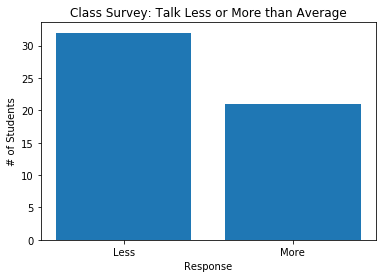

In [10]:
plt.bar(x=talkcounts.index, height=talkcounts.values)
plt.xlabel("Response")
plt.ylabel("# of Students")
plt.title("Class Survey: Talk Less or More than Average")
plt.show()

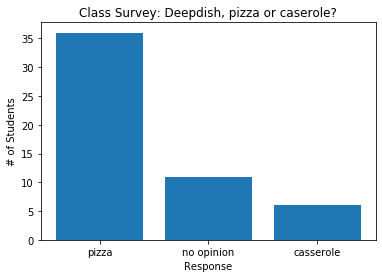

In [11]:
plt.bar(x=dishcounts.index, height=dishcounts.values)
plt.xlabel("Response")
plt.ylabel("# of Students")
plt.title("Class Survey: Deepdish, pizza or caserole?")
plt.show()

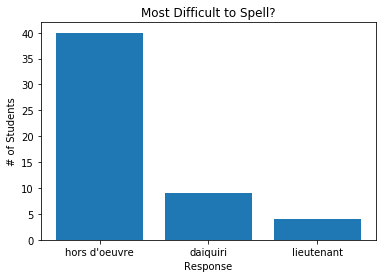

In [12]:
plt.bar(x=spellcounts.index, height=spellcounts.values)
plt.xlabel("Response")
plt.ylabel("# of Students")
plt.title("Most Difficult to Spell?")
plt.show()

In [13]:
pd.crosstab(df['spell'], df['talk'], normalize='columns')

talk,Less,More
spell,,
daiquiri,0.12500,0.238095
hors d'oeuvre,0.84375,0.619048
lieutenant,0.03125,0.142857


In [14]:
pd.crosstab(df['spell'], df['deepdish'], normalize='columns')

deepdish,casserole,no opinion,pizza
spell,,,
daiquiri,0.000000,0.181818,0.194444
hors d'oeuvre,0.833333,0.636364,0.777778
lieutenant,0.166667,0.181818,0.027778


In [15]:
pd.crosstab(df['deepdish'], df['talk'], normalize='columns')

talk,Less,More
deepdish,,
casserole,0.09375,0.142857
no opinion,0.21875,0.190476
pizza,0.68750,0.666667


## Step 5a:
* We want to calculate the mean value for the optimal number of people to hangout with. However, some students responded with a range (for example 6-7) rather than an integer so this column is currently being treated as a string.  
* Run the cell below then check your dataframe and see if you can figure out what the code did. Hint: NaN means "Not a Number".  

In [16]:
df["hangout_numeric"] = pd.to_numeric(df["hangout"], errors='coerce') # what does this code do?
df[['hangout', 'hangout_numeric']] # what does this code do?

,hangout,hangout_numeric
0,5,5.0
1,2,2.0
2,3,3.0
3,4,4.0
4,3,3.0
5,3,3.0
6,5,5.0
7,5,5.0
8,4,4.0
9,3,3.0


## Step 5b:
* Calculate the mean value of 'hangout_numeric'.
* We essentially threw out data in the previous step by removing the answers that contained a range. What effect might this have on your mean value?
* Create vizualizations to examine the question: Do people who say they talk more or less differ in how many people they think is the optimal number to hangout with?

In [17]:
# write and test your code here
df.groupby('talk').mean()   #['hangout_numeric'].mean()

,likepizza,hangout_numeric
talk,,
Less,4.375000,3.833333
More,4.333333,4.050000


In [18]:
# calculate the mean value of hangout_numeric
df['hangout_numeric'].mean()

3.92

In [19]:
# talk more or less differ in hangout?
hangoutmeans = df.groupby(by='talk')['hangout_numeric'].mean()
hangoutmeans

talk
Less    3.833333
More    4.050000
Name: hangout_numeric, dtype: float64

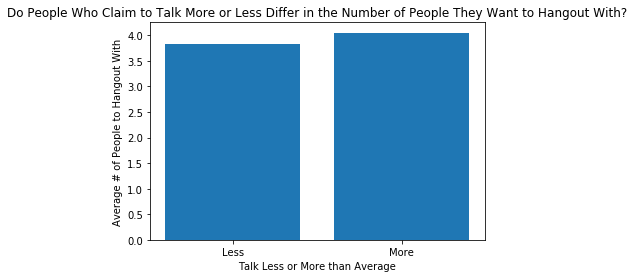

In [20]:
plt.bar(x=hangoutmeans.index, height=hangoutmeans.values)
plt.xlabel("Talk Less or More than Average")
plt.ylabel("Average # of People to Hangout With")
plt.title("Do People Who Claim to Talk More or Less Differ in the Number of People They Want to Hangout With?")
plt.show()

## Step 6:
* Write code to find the top three cities students want to live in and the top three locations students want to travel to.


In [21]:
# write and test your code here

city_count = df['city'].value_counts()[0:2]
city_count

Tokyo      5
Chicago    4
Name: city, dtype: int64

In [22]:
df['city'].value_counts().head(3)

Tokyo      5
Chicago    4
Seattle    3
Name: city, dtype: int64

In [23]:
df['travel'].value_counts().head(3)

Bora Bora    3
Hawaii       3
Fiji         2
Name: travel, dtype: int64

***
## Step 7a:
* The time machine question also contains a mix of numbers and letters that needs to be cleaned before we can do much with it.  
* Run this to get a 'year_clean' column. Don't worry about how this code works. 

In [24]:
# you won't need to know this for the test
df['year_clean'] = df['year'].str.extract(r'(\d\d\d\d)')
df['year_num'] = pd.to_numeric(df["year_clean"], errors='coerce')
df['decade'] = df['year_num'] // 10 * 10

## Step 7b:
* It is highly likely that there are multiple outliers in our decade data. Either students who want to go back to prehistory or students who want to do deep into the future. Use query to create a data set that only contains rows with values between the years of 1900 and 2000. Call the new dataset 'dfrecent'.


In [25]:
# write and test your code here

In [26]:
dfrecent = df.query('decade >= 1900 and decade <= 2000')
dfrecent['decade']

2     1910.0
4     1980.0
5     1990.0
7     1950.0
9     1980.0
12    1940.0
13    1980.0
14    1980.0
16    1920.0
17    1960.0
19    1920.0
21    1990.0
23    1920.0
24    1990.0
25    1970.0
26    1920.0
27    1920.0
28    1990.0
32    1900.0
33    2000.0
34    1940.0
37    1980.0
38    1950.0
40    1990.0
41    1920.0
42    1980.0
44    1950.0
45    1960.0
50    1970.0
Name: decade, dtype: float64

## Step 7c:
* Plot a histogram of 'decade' using dfrecent. What's the least popular decade to visit? 

In [27]:
# write and test your code here

(array([1., 1., 6., 0., 2., 3., 2., 2., 6., 6.]),
 array([1900., 1910., 1920., 1930., 1940., 1950., 1960., 1970., 1980.,
        1990., 2000.]),
 <a list of 10 Patch objects>)

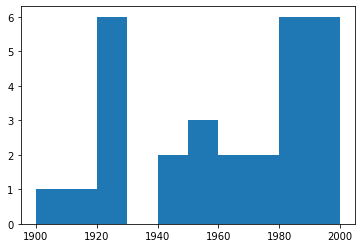

In [28]:
plt.hist(dfrecent['decade'])

***
## Step 8a:
* Let's pull some data out of the dataframe so you can work on the data using tools you are familiar with. This code block takes a series from the dataframe and places each seperate value in the series in a list.

In [29]:
# don't worry about how this code works. It won't be on the test.
quotelist = df['quote'].loc[df['quote'].notnull()].tolist()

## Step 8b:
* Use a for loop with `quotelist` to calculate the average length of quotes submitted by students

In [30]:
# write and test your code here

In [31]:
quotelength = 0
for quote in quotelist:
    quotelength = quotelength + len(quote)

print('The length of the average student quote in characters is:', quotelength/len(quotelist))

The legnth of the average student quote in characters is: 81.22916666666667


## Step 8c:
* We can do the same thing in pandas by telling the dataframe to store the length of each value in a new column and then getting the mean of that column.
* This should return the same answer as your for loop

In [32]:
df['quotelength'] = df['quote'].str.len() # in pandas the length of a string can be calculated by calling the str.len() method
# write code here to get the mean of 'quotelength'

In [33]:
df['quotelength'].mean()

81.22916666666667

In [34]:
# Extra Fun Stuff

# 1. Generate a visualization exploring the relationship between 'deepdish' and 'likepizza'.
# 2. Generate a visualization exploring the relationship between 'decade' and 'likepizza'. (use query again to clean up 'decade')